## Supervised Learning
## Project: Song Popularity Estimator

In this Project, data will be collected directly from Spotify, a digital music streaming service, and utilize supervised learning models to predict song popularity. Spotify provides access to song data for developers. Data includes song popularity, artist popularity, and audio analysis such as loudness, tempo, key, mode, pitch, timbre, and so fourth. As we will be using python, 'spotipy', provided by Spotify will be utilized. We will implement various supervised models and choose best candidate that estimates song popularity. Our goal is to get and provide estimated popularity of a new song. 

____
## Data Exploration

First of all, lets get one of the songs information and explore the data. We will be utilizing spotipy to collect all the data. Song popularity, artist popularity, artist follower and audio analysis data such as loudness, tempo, key, mode, confidence, pitch and timbre will be explored. 

In order to access to the data provided by Spotify, we will use client credential for authorization and get access token. Run the code to get access token.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import display
import numpy as np
# Using Client Credentials for authorization
client_credentials_manager = SpotifyClientCredentials(client_id="f2d11bfce2cf4bae8e096454ca4299ed",client_secret="0192b251aff04567a49d33d83287a254")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
# get access token for spotify
token = client_credentials_manager.get_access_token()

As we have gotten access token, we need to get necessary information regarding the track and artist. Track information includes unnecessary information such as available markets, external urls, and image of the track. We will only need track popularity, track name, track uri, artist name, artist popularity and artist followers.

In [5]:
# get basic artist information and song information
track = "7BKLCZ1jbUBVqRi2FVlTVw"
track_info = sp.tracks(tracks)
track_info1 = track_info['tracks'][0]
artist_uri = (track_info1['artists'][0]['uri'])
artist_name = (track_info1['artists'][0]['name'])
song_name = (track_info1['name'])
song_popularity = (track_info1['popularity'])
artist = sp.artist(artist_uri)
artist_popularity = artist['popularity']
artist_followers =(artist['followers']['total'])

Furthermore, run the below code to get audio analysis data

In [7]:
# get audio analysis data for the track
audio_analysis = sp.audio_analysis(track)
audio_section_data = audio_analysis['sections']
audio_segment_data = audio_analysis['segments']

Now, as we have gotten all the necessary data, lets take a look at all the data.

First, lets see artist and song information.

In [17]:
print("Song Information")
song_info = {"song_name":song_name,"song_uri":track,"song_popularity":song_popularity}
display(song_info)
print()
print("Artist Information")
artist_info = {"artist_name":artist_name,"artist_uri":artist_uri,"artist_popularity":artist_popularity\
              ,"artist_followers":artist_followers}
display(artist_info)

Song Information


{'song_name': 'Closer',
 'song_uri': '7BKLCZ1jbUBVqRi2FVlTVw',
 'song_popularity': 85}


Artist Information


{'artist_name': 'The Chainsmokers',
 'artist_uri': 'spotify:artist:69GGBxA162lTqCwzJG5jLp',
 'artist_popularity': 88,
 'artist_followers': 11026930}

Next, lets see audio analysis data. We will be using sectional data and segmental data from audio analysis. Run the code below the check the data obtained.

In [18]:
display(audio_analysis['sections'][0])

{'start': 0.0,
 'duration': 10.64051,
 'confidence': 1.0,
 'loudness': -20.173,
 'tempo': 95.149,
 'tempo_confidence': 0.411,
 'key': 8,
 'key_confidence': 0.321,
 'mode': 1,
 'mode_confidence': 0.673,
 'time_signature': 4,
 'time_signature_confidence': 1.0}

In [19]:
display(audio_analysis['segments'][0])

{'start': 0.0,
 'duration': 0.17914,
 'confidence': 0.0,
 'loudness_start': -60.0,
 'loudness_max_time': 0.0,
 'loudness_max': -60.0,
 'pitches': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'timbre': [0.0,
  171.13,
  9.469,
  -28.48,
  57.491,
  -50.067,
  14.833,
  5.359,
  -27.228,
  0.973,
  -10.64,
  -7.228]}

As we can see, there is duration of each data, both in sectional and segmental data. From sectional data, we will be using confidence, loudness, tempo, tempo confidence, key, key confidence, mode, mode confidence, time signature and time signature confidence.
From segmental data, we will be using pitches and timbre. 
As we can see both pitch and timbre data are in array. Pitch array implies dominance of 12 pitch classes from C, C#, D to B. Dominance is ranging from 0 to 1, where 1 is highest dominance and 0 is the opposite. 
Timbre represents quality of sound or musical note. As mentioned from Spotify, 'It is a complex notion also reffered to as sound color, texture, or tone quality, and is derived from the shape of a segment's specgtro-temporal surface, independently of pitch and loudness.' 
For further information, please visit: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/


Now, lets see how data changes through out the track. We will graph the confidence, loudness, tempo, tempo confidence, key, key confidence, mode and mode confidence with respect to time. As duration or time for each data differs, the length of each data is different. 

Run the codes below to check out the graphs.

Text(0.5,1,'Time vs Confidence for Closer by The Chainsmokers')

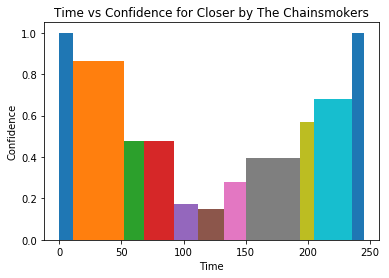

In [82]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(0,len(audio_section_data)):
    confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['confidence'],width =audio_section_data[i]['duration'])               

plt.xlabel("Time")
plt.ylabel("Confidence")
plt.title("Time vs Confidence for " + str(song_name)+" by " + str(artist_name))

Text(0.5,1,'Time vs Loudness for Closer by The Chainsmokers')

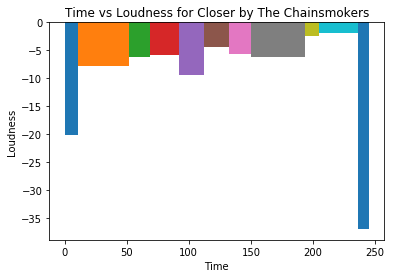

In [83]:
for i in range(0,len(audio_section_data)):
    loudness_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['loudness'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Loudness")
plt.title("Time vs Loudness for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Tempo for Closer by The Chainsmokers')

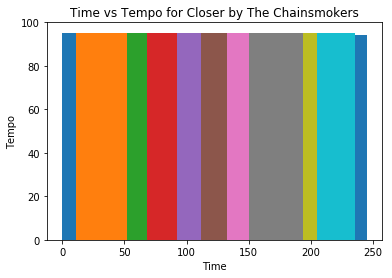

In [84]:
for i in range(0,len(audio_section_data)):
    tempo_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['tempo'],width =audio_section_data[i]['duration'])
    
plt.xlabel("Time")
plt.ylabel("Tempo")
plt.title("Time vs Tempo for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Tempo Confidence for Closer by The Chainsmokers')

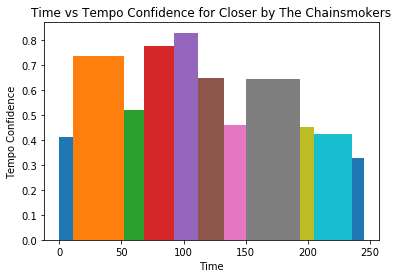

In [85]:
for i in range(0,len(audio_section_data)):
    tempo_confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['tempo_confidence'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Tempo Confidence")
plt.title("Time vs Tempo Confidence for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Key for Closer by The Chainsmokers')

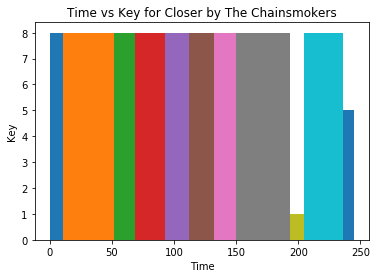

In [86]:
for i in range(0,len(audio_section_data)):
    key_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['key'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Key")
plt.title("Time vs Key for " + str(song_name)+" by " + str(artist_name))
   

Text(0.5,1,'Time vs Key Confidence for Closer by The Chainsmokers')

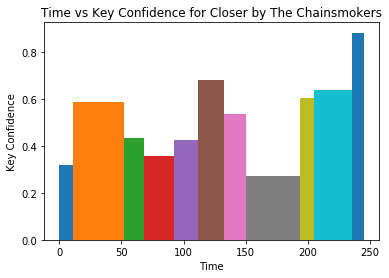

In [87]:
for i in range(0,len(audio_section_data)):
    key_confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['key_confidence'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Key Confidence")
plt.title("Time vs Key Confidence for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Mode for Closer by The Chainsmokers')

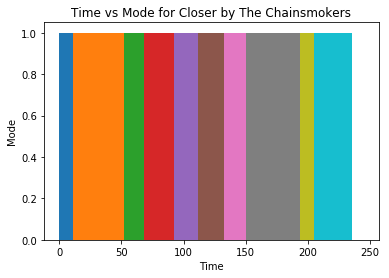

In [88]:
for i in range(0,len(audio_section_data)):
    mode_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['mode'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Mode")
plt.title("Time vs Mode for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Mode Confidence for Closer by The Chainsmokers')

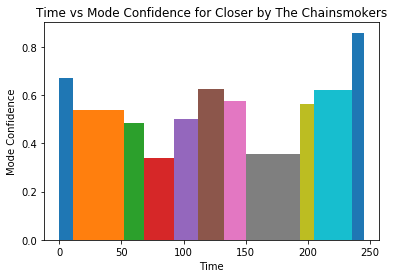

In [89]:
for i in range(0,len(audio_section_data)): 
    mode_confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['mode_confidence'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Mode Confidence")
plt.title("Time vs Mode Confidence for " + str(song_name)+" by " + str(artist_name))


Be note that tempo, key, and mode does not vary or only varies slightly for a short period of time. This is because as tempo, key or mode is usually constant through out the track.

____
## Import Dataset
Now we will import the dataset collected from Spotify. Genre of all the song data are EDM or EDM-POP. We have limited the genre as different genre would have different components that makes music popular. 